# Imports and Helper functions


In [3]:
# Import libraries
import gym
import torch
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
plt.style.use('ggplot')


In [4]:
# Create enviornment
env = gym.make('FrozenLake-v0')

In [5]:
# check the states 
state_space = env.observation_space.n

In [6]:
# check action space
action_space = env.action_space.n

tensor([[0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.8515, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.9801, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 1.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000]])
Percent of episodes finished successfully : 0.016
Percent of episodes finished successfully (last 100 episodes) : 0.02
Average number of steps: 7.90
Average number of steps (last 100 episodes): 7.94


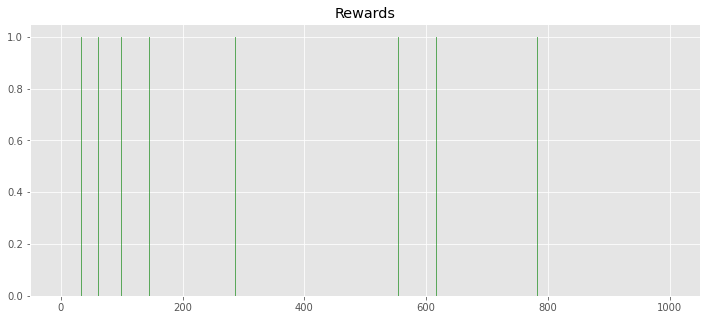

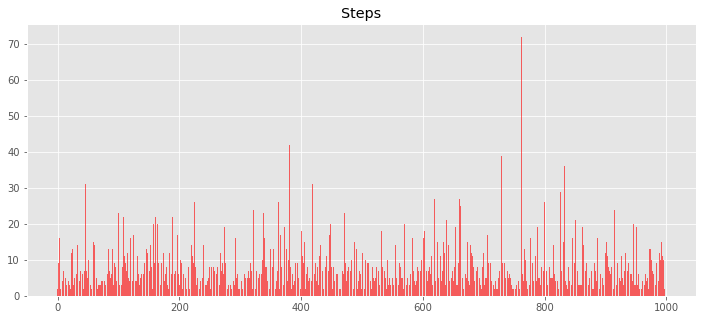

In [7]:
num_episode = 1000
steps_total = []
gamma = 0.99

total_reward = []

Q = torch.zeros([state_space, action_space])

for i_episode in range(num_episode):
    state = env.reset()
    step = 0
    
    while True:
        step += 1

        random_values = Q[state] + torch.rand(1, action_space)/1000  # add some randomness to the current Q state value 
        action = torch.max(random_values, 1)[1].item() # get the action from the max value state
        
        new_state, reward, done, info = env.step(action)

        # Update Q table using bellman equation
        Q[state][action] = reward + gamma * torch.max(Q[new_state])

        state = new_state

        #env.render()
        if done:
            steps_total.append(step)
            total_reward.append(reward)
            #print('episode finished after %i steps' %step)
            break

print(Q)
print('Percent of episodes finished successfully : {0}'.format(sum(total_reward)/num_episode))
print('Percent of episodes finished successfully (last 100 episodes) : {0}'.format(sum(total_reward[-100:])/100))
print('Average number of steps: %.2f' % (sum(steps_total)/num_episode))
print('Average number of steps (last 100 episodes): %.2f' % (sum(steps_total[-100:])/100))

plt.figure(figsize = (12, 5))
plt.title('Rewards')
plt.bar(torch.arange(len(total_reward)), total_reward, alpha = 0.6, color = 'green')
plt.show()

plt.figure(figsize = (12, 5))
plt.title('Steps')
plt.bar(torch.arange(len(steps_total)), steps_total, alpha = 0.6, color = 'red')
plt.show()